<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_DenoisingAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
input_img = Input(shape=(28,28,1))

# Build Encoder / Downsampling
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

# Build Decoder / UpSampling
x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [21]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

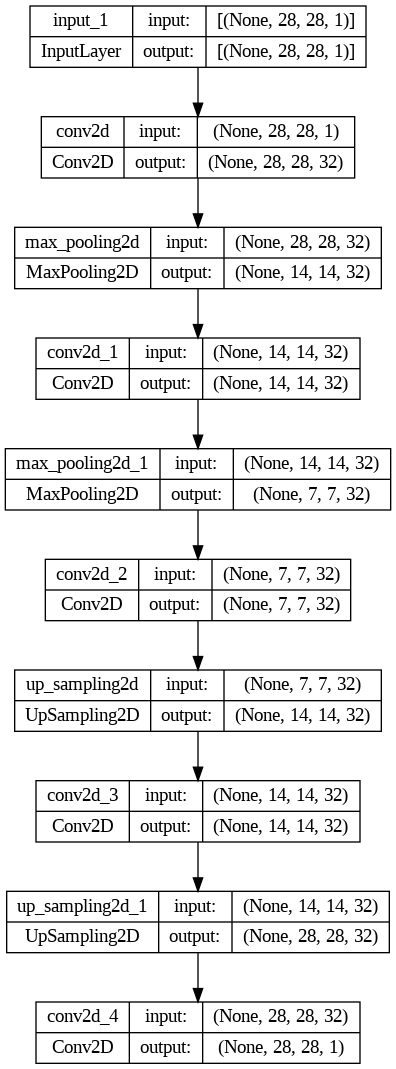

In [22]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

In [24]:
noise_threshold = 0.5
x_train_noisy = x_train + noise_threshold * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_threshold * np.random.normal(size=x_test.shape)

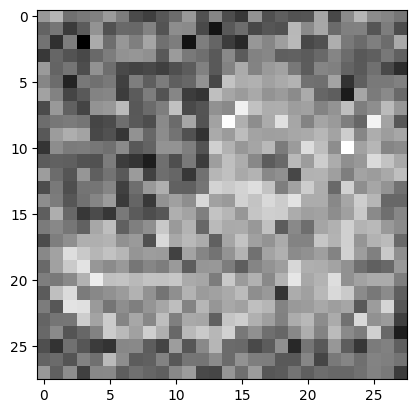

In [25]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [26]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

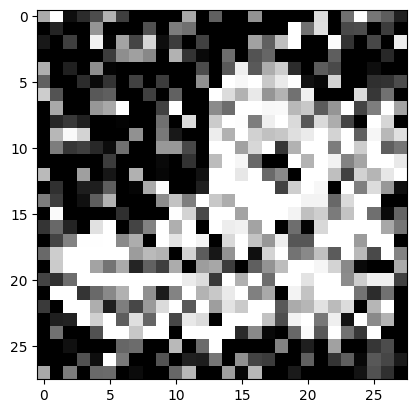

In [27]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [28]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=64, shuffle=True,
               validation_data=(x_test_noisy, x_test))

Epoch 1/20
938/938 [==============================] - 8s 6ms/step - loss: 0.2934 - val_loss: 0.2949
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2923 - val_loss: 0.2940
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2915 - val_loss: 0.2938
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2909 - val_loss: 0.2928
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2905 - val_loss: 0.2928
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.2901 - val_loss: 0.2923
Epoch 7/20
938/938 [==============================] - 7s 7ms/step - loss: 0.2898 - val_loss: 0.2921
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2896 - val_loss: 0.2920
Epoch 9/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2894 - val_loss: 0.2918
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2892 - val_loss: 0.292

In [29]:
decoded_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


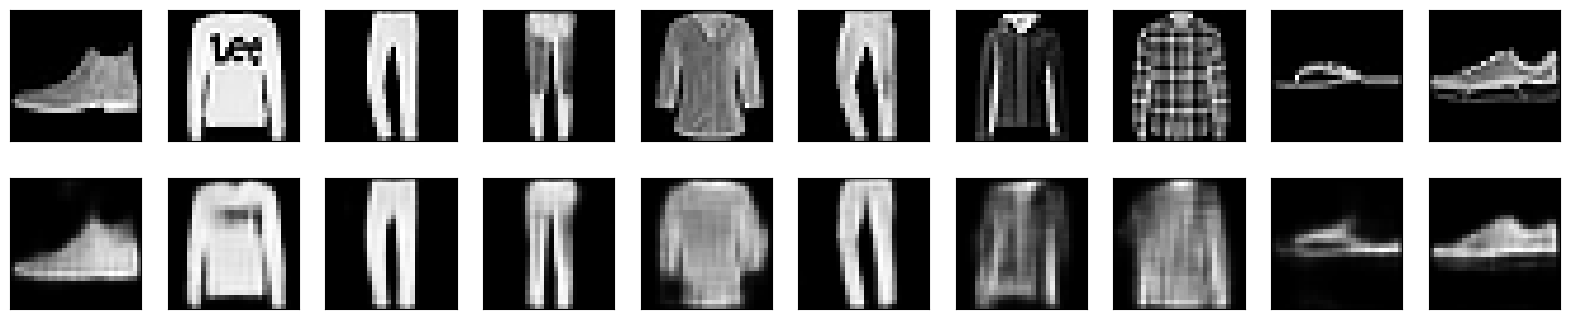

In [30]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    # ploting original image
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n+i+1)
    # ploting decoded/reconstructued image
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()